# ***ADXL345***

### **Using Ada**

In [ ]:
# https://github.com/adafruit/Adafruit_Python_ADXL345
# Simple demo of of the ADXL345 accelerometer library.  Will print the X, Y, Z
# axis acceleration values every half second.
# Author: Tony DiCola
# License: Public Domain
import time

# Import the ADXL345 module.
import Adafruit_ADXL345


# Create an ADXL345 instance.
accel = Adafruit_ADXL345.ADXL345()

# Alternatively you can specify the device address and I2C bus with parameters:
#accel = Adafruit_ADXL345.ADXL345(address=0x54, busnum=2)

# You can optionally change the range to one of:
#  - ADXL345_RANGE_2_G   = +/-2G (default)
#  - ADXL345_RANGE_4_G   = +/-4G
#  - ADXL345_RANGE_8_G   = +/-8G
#  - ADXL345_RANGE_16_G  = +/-16G
# For example to set to +/- 16G:
#accel.set_range(Adafruit_ADXL345.ADXL345_RANGE_16_G)

# Or change the data rate to one of:
#  - ADXL345_DATARATE_0_10_HZ = 0.1 hz
#  - ADXL345_DATARATE_0_20_HZ = 0.2 hz
#  - ADXL345_DATARATE_0_39_HZ = 0.39 hz
#  - ADXL345_DATARATE_0_78_HZ = 0.78 hz
#  - ADXL345_DATARATE_1_56_HZ = 1.56 hz
#  - ADXL345_DATARATE_3_13_HZ = 3.13 hz
#  - ADXL345_DATARATE_6_25HZ  = 6.25 hz
#  - ADXL345_DATARATE_12_5_HZ = 12.5 hz
#  - ADXL345_DATARATE_25_HZ   = 25 hz
#  - ADXL345_DATARATE_50_HZ   = 50 hz
#  - ADXL345_DATARATE_100_HZ  = 100 hz (default)
#  - ADXL345_DATARATE_200_HZ  = 200 hz
#  - ADXL345_DATARATE_400_HZ  = 400 hz
#  - ADXL345_DATARATE_800_HZ  = 800 hz
#  - ADXL345_DATARATE_1600_HZ = 1600 hz
#  - ADXL345_DATARATE_3200_HZ = 3200 hz
# For example to set to 6.25 hz:
#accel.set_data_rate(Adafruit_ADXL345.ADXL345_DATARATE_6_25HZ)

print('Printing X, Y, Z axis values, press Ctrl-C to quit...')
while True:
    # Read the X, Y, Z axis acceleration values and print them.
    x, y, z = accel.read()
    print('X={0}, Y={1}, Z={2}'.format(x, y, z))
    # Wait half a second and repeat.
    time.sleep(0.5)

In [ ]:
#used 1 accelerometer adxl345
import time
import Adafruit_ADXL345

accel = Adafruit_ADXL345.ADXL345()

print('Printing X, Y, Z axis values, press Ctrl-C to quit...')
cordinates = []

import time
start_time = time.time()
NUM_OF_SEC_TO_RUN = 10

while time.time()<=start_time+NUM_OF_SEC_TO_RUN:
x, y, z = accel.read()
cordinates.append([x,y,z,time.time()])

import csv
with open('01.txt', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(cordinates)

In [ ]:
#used 2 adxl345 simultaneously
import time
import Adafruit_ADXL345


accel1 = Adafruit_ADXL345.ADXL345()
accel2 = Adafruit_ADXL345.ADXL345(address=0x1d, busnum=1)


print('Printing X, Y, Z axis values, press Ctrl-C to quit...')
cordinates = []

import time
start_time = time.time()
NUM_OF_SEC_TO_RUN = 10 

while time.time()<=start_time+NUM_OF_SEC_TO_RUN:

    x1, y1, z1 = accel1.read()
    x2, y2, z2 = accel2.read()
    cordinates.append([x1,y1,z1,x2,y2,z2,time.time()])

import csv
with open('02.txt', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(cordinates)

### **Without Ada**

In [ ]:
import smbus
import time
from time import sleep
import sys

bus = smbus.SMBus(1)

bus.write_byte_data(0x53, 0x2C, 0x0B)
value = bus.read_byte_data(0x53, 0x31)
value &= ~0x0F;
value |= 0x0B;  
value |= 0x08;
bus.write_byte_data(0x53, 0x31, value)
bus.write_byte_data(0x53, 0x2D, 0x08)

def getAxes():
    bytes = bus.read_i2c_block_data(0x53, 0x32, 6)
        
    x = bytes[0] | (bytes[1] << 8)
    if(x & (1 << 16 - 1)):
        x = x - (1<<16)

    y = bytes[2] | (bytes[3] << 8)
    if(y & (1 << 16 - 1)):
        y = y - (1<<16)

    z = bytes[4] | (bytes[5] << 8)
    if(z & (1 << 16 - 1)):
        z = z - (1<<16)

    x = x * 0.004 
    y = y * 0.004
    z = z * 0.004

    x = x * 9.80665
    y = y * 9.80665
    z = z * 9.80665

    x = round(x, 4)
    y = round(y, 4)
    z = round(z, 4)

    print("   x = %.3f ms2" %x)
    print("   y = %.3f ms2" %y)
    print("   z = %.3f ms2" %z)
    print("\n\n")
    
    return {"x": x, "y": y, "z": z}
    
try:
    while True: 
        getAxes()
        time.sleep(2)
except KeyboardInterrupt:
    sys.exit()


### **MAX6675**

In [ ]:
#!/usr/bin/env python

# MAX6675.py
# 2016-05-02
# Public Domain

import time
import pigpio # http://abyz.co.uk/rpi/pigpio/python.html

"""
This script reads the temperature of a type K thermocouple
connected to a MAX6675 SPI chip.

Type K thermocouples are made of chromel (+ve) and alumel (-ve)
and are the commonest general purpose thermocouple with a
sensitivity of approximately 41 uV/C.

The MAX6675 returns a 12-bit reading in the range 0 - 4095 with
the units as 0.25 degrees centigrade.  So the reported
temperature range is 0 - 1023.75 C.

Accuracy is about +/- 2 C between 0 - 700 C and +/- 5 C
between 700 - 1000 C.

The MAX6675 returns 16 bits as follows

F   E   D   C   B   A   9   8   7   6   5   4   3   2   1   0
0  B11 B10  B9  B8  B7  B6  B5  B4  B3  B2  B1  B0  0   0   X

The reading is in B11 (most significant bit) to B0.

The conversion time is 0.22 seconds.  If you try to read more
often the sensor will always return the last read value.
"""

pi = pigpio.pi()

if not pi.connected:
   exit(0)

# pi.spi_open(0, 1000000, 0)   # CE0, 1Mbps, main SPI
# pi.spi_open(1, 1000000, 0)   # CE1, 1Mbps, main SPI
# pi.spi_open(0, 1000000, 256) # CE0, 1Mbps, auxiliary SPI
# pi.spi_open(1, 1000000, 256) # CE1, 1Mbps, auxiliary SPI
# pi.spi_open(2, 1000000, 256) # CE2, 1Mbps, auxiliary SPI

sensor = pi.spi_open(2, 1000000, 256) # CE2 on auxiliary SPI

stop = time.time() + 600

while time.time() < stop:
   c, d = pi.spi_read(sensor, 2)
   if c == 2:
      word = (d[0]<<8) | d[1]
      if (word & 0x8006) == 0: # Bits 15, 2, and 1 should be zero.
         t = (word >> 3)/4.0
         print("{:.2f}".format(t))
      else:
         print("bad reading {:b}".format(word))
   time.sleep(0.25) # Don't try to read more often than 4 times a second.

pi.spi_close(sensor)

pi.stop()


In [ ]:
# git clone https://github.com/tdack/MAX6675
# (go to setup.py for that do: ls MAX6675)
# cd MAX6675
# sudo python3 setup.py install

import MAX6675.MAX6675 as MAX6675

CSK = 25

CS = 24

DO = 18

sensor = MAX6675.MAX6675 (CSK,CS,DO)

try:

  while True:

    Temp = sensor.readTempC()

    print("Temperatura ==> (0:0.2F)".format(Temp))


except KeyboardInterrupt:


    print("Finalizado....")

In [ ]:
#!/usr/bin/python

from Tkinter import *
import spidev
import max6675
import datetime
from time import sleep

root = Tk()
root.title('Thermocouple')

dateTime = Label(root, font = ('fixed', 20),)
dateTime.grid(sticky = N, row = 1, column = 1, padx = 5, pady = (20,20))
internalTemp = Label(root, font = ('fixed', 20),)
internalTemp.grid(sticky = N, row = 2, column = 1, padx = 5, pady = (20,20))
measuredTemp = Label(root, font = ('fixed', 20),)
measuredTemp.grid(sticky = N, row = 3, column = 1, padx = 5, pady = (20,20))


def updateTemp(event = None):
    current = datetime.datetime.now()
    dateTime.config(text=current.ctime())
    sensor = max6675.Max6675(0, 0)
    measuredTemp.config(text=sensor.temperature)
    root.after(600,updateTemp)

updateTemp()
root.mainloop()

In [ ]:
#!/usr/bin/env python

# Copyright 2014 IIJ Innovation Institute Inc. All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
#     * Redistributions of source code must retain the above copyright
#       notice, this list of conditions and the following disclaimer.
#     * Redistributions in binary form must reproduce the above copyright
#       notice, this list of conditions and the following disclaimer in the
#       documentation and/or other materials provided with the distribution.
#
# THIS SOFTWARE IS PROVIDED BY IIJ INNOVATION INSTITUTE INC. ``AS IS'' AND
# ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
# ARE DISCLAIMED. IN NO EVENT SHALL IIJ INNOVATION INSTITUTE INC. OR
# CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL,
# EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO,
# PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS;
# OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY,
# WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR
# OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF
# ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# Copyright 2014 Keiichi Shima. All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are
# met:
#     * Redistributions of source code must retain the above copyright
#       notice, this list of conditions and the following disclaimer.
#     * Redistributions in binary form must reproduce the above
#       copyright notice, this list of conditions and the following
#       disclaimer in the documentation and/or other materials provided
#       with the distribution.
#
# THIS SOFTWARE IS PROVIDED BY THE AUTHOR ``AS IS'' AND ANY EXPRESS OR
# IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
# WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE AUTHOR OR CONTRIBUTORS BE LIABLE FOR
# ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
# DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE
# GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
# INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER
# IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR
# OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF
# ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

'''A Python class to access MAX6675 based temperature sensor.  The
spidev module (https://github.com/doceme/py-spidev) is required.

Example:

import spidev
import max6675

sensor = max6675.Max6675(0, 0)
print sensor.temperature

'''

import sensorbase
import spidev
import time

class Max6675(sensorbase.SensorBase):
    def __init__(self, bus = None, client = None):
        '''Initializes the sensor.

        bus: The SPI bus.
        client: The identifier of the client.

        '''
        assert(bus is not None)
        assert(client is not None)

        super(Max6675, self).__init__(self._update_sensor_data)

        self._bus = bus
        self._client = client

        self._temperature = None

        self._handle = spidev.SpiDev(self._bus, self._client)

    def __del__(self):
        if hasattr(self, '_handle'):
            self._handle.close()

    @property
    def temperature(self):
        '''Returns a temperature value.  Returns None if no valid value is
        set yet.

        '''
        self._update()
        return (self._temperature)

    def _update_sensor_data(self):
        vals = self._handle.readbytes(2)
        self._temperature = ((vals[0] << 8 | vals[1]) >> 3) * 0.25

if __name__ == '__main__':
    import spidev

    sensor = Max6675(0, 0)
    for cache in [0, 5]:
        print '**********'
        print 'Cache lifetime is %d' % cache
        sensor.cache_lifetime = cache
        for c in range(10):
            print sensor.temperature

In [ ]:
#!/usr/bin/python
# coding: utf8

# Copyright (c) 2014 Adafruit Industries
# Author: Tony DiCola
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

# Can enable debug output by uncommenting:
#import logging
#logging.basicConfig(level=logging.DEBUG)

import time

import Adafruit_GPIO.SPI as SPI
import MAX6675.MAX6675 as MAX6675


# Define a function to convert celsius to fahrenheit.
def c_to_f(c):
        return c * 9.0 / 5.0 + 32.0


# Uncomment one of the blocks of code below to configure your Pi or BBB to use
# software or hardware SPI.

# Raspberry Pi software SPI configuration.
# CLK = 25
# CS  = 24
# DO  = 18
# sensor = MAX6675.MAX6675(CLK, CS, DO)

# Raspberry Pi hardware SPI configuration.
#SPI_PORT   = 0
#SPI_DEVICE = 0
#sensor = MAX6675.MAX6675(spi=SPI.SpiDev(SPI_PORT, SPI_DEVICE))

# BeagleBone Black software SPI configuration.
CLK = 'P9_12'
CS  = 'P9_15'
DO  = 'P9_23'
sensor = MAX6675.MAX6675(CLK, CS, DO)

# BeagleBone Black hardware SPI configuration.
# SPI_PORT   = 1
# SPI_DEVICE = 0
# sensor = MAX6675.MAX6675(spi=SPI.SpiDev(SPI_PORT, SPI_DEVICE))

# Loop printing measurements every second.
print 'Press Ctrl-C to quit.'
while True:
	temp = sensor.readTempC()
	print 'Thermocouple Temperature: {0:0.3F}°C / {1:0.3F}°F'.format(temp, c_to_f(temp))
	time.sleep(1.0)

### **MLX90614**

In [ ]:
# SPDX-FileCopyrightText: 2021 ladyada for Adafruit Industries
# SPDX-License-Identifier: MIT

#  Designed specifically to work with the MLX90614 sensors in the
#  adafruit shop
#  ----> https://www.adafruit.com/product/1747
#  ----> https://www.adafruit.com/product/1748
#
#  These sensors use I2C to communicate, 2 pins are required to
#  interface Adafruit invests time and resources providing this open
#  source code,
#  please support Adafruit and open-source hardware by purchasing
#  products from Adafruit!

import board
import adafruit_mlx90614

# The MLX90614 only works at the default I2C bus speed of 100kHz.
# A higher speed, such as 400kHz, will not work.
i2c = board.I2C()
mlx = adafruit_mlx90614.MLX90614(i2c)

# temperature results in celsius
print("Ambent Temp: ", mlx.ambient_temperature)
print("Object Temp: ", mlx.object_temperature)

### **Google Spreadsheet DHT Sensor**

In [ ]:
#!/usr/bin/python

# Google Spreadsheet DHT Sensor Data-logging Example

# Depends on the 'gspread' and 'oauth2client' package being installed.  If you
# have pip installed execute:
#   sudo pip install gspread oauth2client

# Also it's _very important_ on the Raspberry Pi to install the python-openssl
# package because the version of Python is a bit old and can fail with Google's
# new OAuth2 based authentication.  Run the following command to install the
# the package:
#   sudo apt-get update
#   sudo apt-get install python-openssl

# Copyright (c) 2014 Adafruit Industries
# Author: Tony DiCola

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
import json
import sys
import time
import datetime

import Adafruit_DHT
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Type of sensor, can be Adafruit_DHT.DHT11, Adafruit_DHT.DHT22, or Adafruit_DHT.AM2302.
DHT_TYPE = Adafruit_DHT.DHT22

# Example of sensor connected to Raspberry Pi pin 23
DHT_PIN  = 23
# Example of sensor connected to Beaglebone Black pin P8_11
#DHT_PIN  = 'P8_11'

# Google Docs OAuth credential JSON file.  Note that the process for authenticating
# with Google docs has changed as of ~April 2015.  You _must_ use OAuth2 to log
# in and authenticate with the gspread library.  Unfortunately this process is much
# more complicated than the old process.  You _must_ carefully follow the steps on
# this page to create a new OAuth service in your Google developer console:
#   http://gspread.readthedocs.org/en/latest/oauth2.html
#
# Once you've followed the steps above you should have downloaded a .json file with
# your OAuth2 credentials.  This file has a name like SpreadsheetData-<gibberish>.json.
# Place that file in the same directory as this python script.
#
# Now one last _very important_ step before updating the spreadsheet will work.
# Go to your spreadsheet in Google Spreadsheet and share it to the email address
# inside the 'client_email' setting in the SpreadsheetData-*.json file.  For example
# if the client_email setting inside the .json file has an email address like:
#   149345334675-md0qff5f0kib41meu20f7d1habos3qcu@developer.gserviceaccount.com
# Then use the File -> Share... command in the spreadsheet to share it with read
# and write acess to the email address above.  If you don't do this step then the
# updates to the sheet will fail!
GDOCS_OAUTH_JSON       = 'your SpreadsheetData-*.json file name'

# Google Docs spreadsheet name.
GDOCS_SPREADSHEET_NAME = 'your google docs spreadsheet name'

# How long to wait (in seconds) between measurements.
FREQUENCY_SECONDS      = 30


def login_open_sheet(oauth_key_file, spreadsheet):
    """Connect to Google Docs spreadsheet and return the first worksheet."""
    try:
        scope =  ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        credentials = ServiceAccountCredentials.from_json_keyfile_name(oauth_key_file, scope)
        gc = gspread.authorize(credentials)
        worksheet = gc.open(spreadsheet).sheet1
        return worksheet
    except Exception as ex:
        print('Unable to login and get spreadsheet.  Check OAuth credentials, spreadsheet name, and make sure spreadsheet is shared to the client_email address in the OAuth .json file!')
        print('Google sheet login failed with error:', ex)
        sys.exit(1)


print('Logging sensor measurements to {0} every {1} seconds.'.format(GDOCS_SPREADSHEET_NAME, FREQUENCY_SECONDS))
print('Press Ctrl-C to quit.')
worksheet = None
while True:
    # Login if necessary.
    if worksheet is None:
        worksheet = login_open_sheet(GDOCS_OAUTH_JSON, GDOCS_SPREADSHEET_NAME)

    # Attempt to get sensor reading.
    humidity, temp = Adafruit_DHT.read(DHT_TYPE, DHT_PIN)

    # Skip to the next reading if a valid measurement couldn't be taken.
    # This might happen if the CPU is under a lot of load and the sensor
    # can't be reliably read (timing is critical to read the sensor).
    if humidity is None or temp is None:
        time.sleep(2)
        continue

    print('Temperature: {0:0.1f} C'.format(temp))
    print('Humidity:    {0:0.1f} %'.format(humidity))

    # Append the data in the spreadsheet, including a timestamp
    try:
        worksheet.append_row((datetime.datetime.now().isoformat(), temp, humidity))
    except:
        # Error appending data, most likely because credentials are stale.
        # Null out the worksheet so a login is performed at the top of the loop.
        print('Append error, logging in again')
        worksheet = None
        time.sleep(FREQUENCY_SECONDS)
        continue

    # Wait 30 seconds before continuing
    print('Wrote a row to {0}'.format(GDOCS_SPREADSHEET_NAME))
    time.sleep(FREQUENCY_SECONDS)

## **MIXTURE**

In [ ]:
import json
import sys
import time
import datetime

import Adafruit_DHT
import gspread
from oauth2client.service_account import ServiceAccountCredentials

import pigpio

import Adafruit_ADXL345

# Create an ADXL345 instance.
accel = Adafruit_ADXL345.ADXL345()

#ADXL345==

# print('Printing X, Y, Z axis values, press Ctrl-C to quit...')
# while True:
#     # Read the X, Y, Z axis acceleration values and print them.
#     x, y, z = accel.read()
#     print('X={0}, Y={1}, Z={2}'.format(x, y, z))
#     # Wait half a second and repeat.
#     time.sleep(0.5)


#MAX6675==

pi = pigpio.pi()
if not pi.connected:
   exit(0)

sensor = pi.spi_open(2, 1000000, 256) # CE2 on auxiliary SPI
stop = time.time() + 600

while time.time() < stop:
   c, d = pi.spi_read(sensor, 2)
   if c == 2:
      word = (d[0]<<8) | d[1]
      if (word & 0x8006) == 0: # Bits 15, 2, and 1 should be zero.
         t = (word >> 3)/4.0
         print("{:.2f}".format(t))
      else:
         print("bad reading {:b}".format(word))
   time.sleep(0.25) # Don't try to read more often than 4 times a second.

pi.spi_close(sensor)

pi.stop()



#Google Spreadsheet DHT Sensor==


# Type of sensor, can be Adafruit_DHT.DHT11, Adafruit_DHT.DHT22, or Adafruit_DHT.AM2302.
DHT_TYPE = Adafruit_DHT.DHT22

# Example of sensor connected to Raspberry Pi pin 23
DHT_PIN  = 23
# Example of sensor connected to Beaglebone Black pin P8_11
#DHT_PIN  = 'P8_11


GDOCS_OAUTH_JSON       = 'your SpreadsheetData-*.json file name'

# Google Docs spreadsheet name.
GDOCS_SPREADSHEET_NAME = 'your google docs spreadsheet name'

# How long to wait (in seconds) between measurements.
FREQUENCY_SECONDS      = 30


def login_open_sheet(oauth_key_file, spreadsheet):
    """Connect to Google Docs spreadsheet and return the first worksheet."""
    try:
        scope =  ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        credentials = ServiceAccountCredentials.from_json_keyfile_name(oauth_key_file, scope)
        gc = gspread.authorize(credentials)
        worksheet = gc.open(spreadsheet).sheet1
        return worksheet
    except Exception as ex:
        print('Unable to login and get spreadsheet.  Check OAuth credentials, spreadsheet name, and make sure spreadsheet is shared to the client_email address in the OAuth .json file!')
        print('Google sheet login failed with error:', ex)
        sys.exit(1)



print('Logging sensor measurements to {0} every {1} seconds.'.format(GDOCS_SPREADSHEET_NAME, FREQUENCY_SECONDS))
print('Press Ctrl-C to quit.')
worksheet = None
while True:
    # Login if necessary.
    if worksheet is None:
        worksheet = login_open_sheet(GDOCS_OAUTH_JSON, GDOCS_SPREADSHEET_NAME)

    # Attempt to get sensor reading.
    # humidity, temp = Adafruit_DHT.read(DHT_TYPE, DHT_PIN)
     x, y, z = accel.read()

    # Skip to the next reading if a valid measurement couldn't be taken.
    # This might happen if the CPU is under a lot of load and the sensor
    # can't be reliably read (timing is critical to read the sensor).
    if x is None or y is None or z is None :
        time.sleep(2)
        continue

    # print('Temperature: {0:0.1f} C'.format(temp))
    # print('Humidity:    {0:0.1f} %'.format(humidity))
    print('X={0}, Y={1}, Z={2}'.format(x, y, z))

    # Append the data in the spreadsheet, including a timestamp
    try:
        worksheet.append_row((datetime.datetime.now().isoformat(), x, y, z))
    except:
        # Error appending data, most likely because credentials are stale.
        # Null out the worksheet so a login is performed at the top of the loop.
        print('Append error, logging in again')
        worksheet = None
        time.sleep(FREQUENCY_SECONDS)
        continue

    # Wait 30 seconds before continuing
    print('Wrote a row to {0}'.format(GDOCS_SPREADSHEET_NAME))
    time.sleep(FREQUENCY_SECONDS)

## **For CSV**

In [ ]:
# Script to read temperature data from the DHT11:
# Importeer Adafruit DHT bibliotheek.
import Adafruit_DHT
import time
als = True
while als: 
    humidity, temperature = Adafruit_DHT.read_retry(Adafruit_DHT.DHT11, 4) #on gpio pin 4 or pin 7
    if humidity is not None and temperature is not None:
      humidity = round(humidity, 2)
      temperature = round(temperature, 2)
      print 'Temperature = {0:0.1f}*C  Humidity = {1:0.1f}%'.format(temperature, humidity)
    else:
      print 'can not connect to the sensor!'
    time.sleep(60) # read data every minute
    
# Update from the Script above with modification of writing the data to a CSV.file:
# Importeer Adafruit DHT bibliotheek.
#time.strftime("%I:%M:%S")
import Adafruit_DHT
import time
import csv
import sys
csvfile = "temp.csv"
als = True
while als: 
    humidity, temperature = Adafruit_DHT.read_retry(Adafruit_DHT.DHT11, 4) # gpio pin 4 or pin number 7
    if humidity is not None and temperature is not None:
      humidity = round(humidity, 2)
      temperature = round(temperature, 2)
      print 'Temperature = {0:0.1f}*C  Humidity = {1:0.1f}%'.format(temperature, humidity)
    else:
      print 'can not connect to the sensor!'
    timeC = time.strftime("%I")+':' +time.strftime("%M")+':'+time.strftime("%S")
    data = [temperature, timeC]

    with open(csvfile, "a")as output:
        writer = csv.writer(output, delimiter=",", lineterminator = '\n')
        writer.writerow(data)
    time.sleep(6) # update script every 60 seconds
    

## **for graph from csv using matplotlib**

In [ ]:
# Script to read data from the CSV and display it in a graph:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
from datetime import datetime

fig = plt.figure()
rect = fig.patch
rect.set_facecolor('#0079E7')
def animate(i):
    ftemp = 'temp (1).csv'
    fh = open(ftemp)
    temp = list()
    timeC = list()
    for line in fh:
        pieces = line.split(',')
        degree = pieces[0]
        timeB=  pieces[1]
        timeA= timeB[:8]
            #print timeA
        time_string = datetime.strptime(timeA,'%H:%M:%S')
        #print time_string
        try:
            temp.append(float(degree))
            timeC.append(time_string)
        except:
            print ("dont know")
        

        ax1 = fig.add_subplot(1,1,1,axisbg='white')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        ax1.clear()
        ax1.plot(timeC,temp, 'c', linewidth = 3.3)
        plt.title('Temperature')
        plt.xlabel('Time')
        
ani = animation.FuncAnimation(fig, animate, interval = 6000)   
plt.show()


<Figure size 432x288 with 0 Axes>

In [ ]:
import time
import csv
timeC = time.strftime("%I")+':' +time.strftime("%M")+':'+time.strftime("%S")

# l=list(map(str,input().split()))
m=int(input())
for i in range(m):
  i=input()
  data = [i, timeC]

csvfile = "temp.csv"


with open(csvfile, "w")as f:
  writer = csv.writer(f, delimiter=",", lineterminator = '\n')
  writer.writerow(data)

10
25
78
95
13
45
79
32
65
47
84


In [ ]:
import csv 
def get_lenght(file_path):
	with open("temp (1).csv", "r") as csvfile:
		reader = csv.reader(csvfile)
		reader_list = list(reader)
		return len(reader_list)

def append_data(file_path, name, email):
	fieldnames = ['id','name','email']
	next_id = get_lenght(file_path)
	with open(file_path, "a") as csvfile:
		writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
		writer.writerow({
			"id": next_id,
			"name": name,
			"email": email,
		})

while True:
  x,y=input().split()
  # y=input()
  append_data("temp (1).csv",x,y)



mamc kdnlkdn
kdmnv kmdk
eij4 655648
aknowihoufh 646984
nckns 6261
jwc 66
owjofj 9961
vnlml 668
nvsvnw 4861
nvslnvbv 48841
mosmcpw 484321
rsjsv sknk
dnjlvn skm
dlkan aljnv
adljb alkjn
aljvn ljabn


KeyboardInterrupt: ignored

In [ ]:
# Import pandas
import pandas as pd

# reading csv file
pd.read_csv("temp (1).csv")

,1,xyz,abcd@gmail.com
0,2,hey,hello
1,3,bye,hi
2,4,3,5
3,5,4,9
4,6,5,6
5,7,mamc,kdnlkdn
6,8,kdmnv,kmdk
7,9,eij4,655648
8,10,aknowihoufh,646984
9,11,nckns,6261


In [ ]:
#https://youtu.be/Ercd-Ip5PfQ
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()
# we can use x=time y1=accel y2=temp

# **IMP TRIAL**

### **ADXL345 AS *I2C* & MAX6675 AS *SPI***


### BASIC ADXL345

In [ ]:
import time
import Adafruit_ADXL345

accel = Adafruit_ADXL345.ADXL345()

print('Printing X, Y, Z axis values, press Ctrl-C to quit...')
while True:
    # Read the X, Y, Z axis acceleration values and print them.
    x, y, z = accel.read()
    print('X={0}, Y={1}, Z={2}'.format(x, y, z))
    # Wait half a second and repeat.
    time.sleep(0.5)

### BASIC MAX6675

In [ ]:
# git clone https://github.com/tdack/MAX6675
# (go to setup.py for that do: ls MAX6675)
# cd MAX6675
# sudo python3 setup.py install

import MAX6675.MAX6675 as MAX6675

CSK = 25

CS = 24

DO = 18

sensor = MAX6675.MAX6675 (CSK,CS,DO)

try:

  while True:

    Temp = sensor.readTempC()

    print("Temperatura ==> (0:0.2F)".format(Temp))


except KeyboardInterrupt:


    print("Finalizado....")

### TRY COMBINING BOTH IN (While True)

In [ ]:
# git clone https://github.com/tdack/MAX6675
# (go to setup.py for that do: ls MAX6675)
# cd MAX6675
# sudo python3 setup.py install
import time
import Adafruit_ADXL345
import MAX6675.MAX6675 as MAX6675


accel = Adafruit_ADXL345.ADXL345()
CSK = 25
CS = 24
DO = 18
sensor = MAX6675.MAX6675 (CSK,CS,DO)

print('Printing X, Y, Z axis values, press Ctrl-C to quit...')

try:

  while True:
   
    # Read the X, Y, Z axis acceleration values and print them.
    x, y, z = accel.read()
    print('X={0}, Y={1}, Z={2}'.format(x, y, z))

    Temp = sensor.readTempC()
    print("Temperatura ==> (0:0.2F)".format(Temp))
   
    # Wait half a second and repeat.
    time.sleep(0.5)

except KeyboardInterrupt:
  
    print("Finalized....")

### **USE COMBINED AND CREATE CSV**



In [ ]:
# git clone https://github.com/tdack/MAX6675
# (go to setup.py for that do: ls MAX6675)
# cd MAX6675
# sudo python3 setup.py install
import time
from datetime import date
import Adafruit_ADXL345
import MAX6675.MAX6675 as MAX6675
#Create csv file: 'trial.csv' already before running
import csv 
def get_lenght(file_path):
	with open("trial.csv", "r") as csvfile:
		reader = csv.reader(csvfile)
		reader_list = list(reader)
		return len(reader_list)

def append_data(file_path, time, tem, accel):
	fieldnames = ['id','Time','Tem','Accel']
	next_id = get_lenght(file_path)
	with open(file_path, "a") as csvfile:
		writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
		writer.writerow({
			"id": next_id,
			"Time": time,
      "Tem": tem,
			"Accel": accel,
		})
  

accel = Adafruit_ADXL345.ADXL345()
CSK = 25
CS = 24
DO = 18
sensor = MAX6675.MAX6675 (CSK,CS,DO)

print('Printing X, Y, Z axis values, press Ctrl-C to quit...')

try:

  while True:
   
    # Read the X, Y, Z axis acceleration values and print them.
    x, y, z = accel.read()
    print('X={0}, Y={1}, Z={2}'.format(x, y, z))
    accel=sqrt(float(x)**2+float(y)**2+float(z)**2))
    Temp = sensor.readTempC()
    print("Temperatura ==> (0:0.2F)".format(Temp))
    

    # We can append current date with dataset
    # current_date = date.today()
    # print(current_date) this is working fine

    # from datetime import datetime
    # import pytz
    # original = pytz.timezone('Asia/Kolkata')
    # dateTimeObj = datetime.now(original)
    # print(dateTimeObj.strftime('%H:%M:%S'))

    append_data("trial.csv",Temp,accel) #append time also
    # Wait half a second and repeat.
    time.sleep(0.5)

except KeyboardInterrupt:
  
    print("Finalized....")


### TRY TO VIEW CSV

In [ ]:
# Import pandas
import pandas as pd

# reading csv file
pd.read_csv("trial.csv")

### TRY TO PLOT CSV

In [ ]:
#https://youtu.be/Ercd-Ip5PfQ
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

index = count()

def animate(i):
    data = pd.read_csv('trial.csv')
    x = data['Time']
    y1 = data['Tem']
    y2 = data['Accel']

    plt.cla()

    plt.plot(x, y1, label='Temperature')
    plt.plot(x, y2, label='Accel')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()


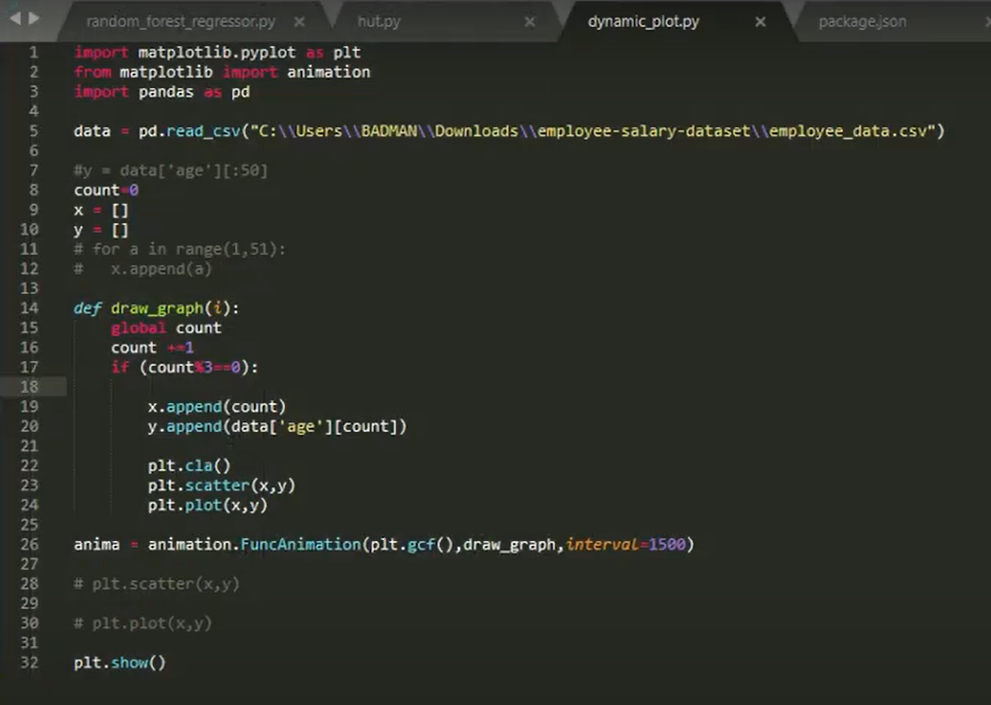

Above example demonstrates the plot with given condition only

In [ ]:
#SUCCESSFULLY SEND TO GS

import json
import sys
import time
import datetime
import random
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from datetime import datetime
import pytz
original = pytz.timezone('Asia/Kolkata')
dateTimeObj = datetime.now(original)
ttime=dateTimeObj.strftime('%H:%M:%S')
ddate=dateTimeObj.strftime('%d-%m-%y')


GDOCS_OAUTH_JSON       = 'data-acquisition-pi-51f4c325fdae.json'

# Google Docs spreadsheet name.
GDOCS_SPREADSHEET_NAME = 'Data_acquisitionPi'

# How long to wait (in seconds) between measurements.
FREQUENCY_SECONDS      = 5
x_value = 0
total_1 = 1000
total_2 = 1000

def login_open_sheet(oauth_key_file, spreadsheet):
    """Connect to Google Docs spreadsheet and return the first worksheet."""
    try:
        scope =  ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
        credentials = ServiceAccountCredentials.from_json_keyfile_name(oauth_key_file, scope)
        gc = gspread.authorize(credentials)
        worksheet = gc.open(spreadsheet).sheet1
        return worksheet
    except Exception as ex:
        print('Unable to login and get spreadsheet.  Check OAuth credentials, spreadsheet name, and make sure spreadsheet is shared to the client_email address in the OAuth .json file!')
        print('Google sheet login failed with error:', ex)
        sys.exit(1)


print('Logging measurements to {0} every {1} seconds.'.format(GDOCS_SPREADSHEET_NAME, FREQUENCY_SECONDS))
print('Press Ctrl-C to quit.')
worksheet = None
while True:
    # Login if necessary.
    if worksheet is None:
        worksheet = login_open_sheet(GDOCS_OAUTH_JSON, GDOCS_SPREADSHEET_NAME)

    # Attempt to get sensor reading.
    # humidity, temp = Adafruit_DHT.read(DHT_TYPE, DHT_PIN)
    print(x_value, total_1, total_2)

    x_value += 1
    total_1 = total_1 + random.randint(-6, 8)
    total_2 = total_2 + random.randint(-5, 6)

    time.sleep(2)
    # if humidity is None or temp is None:
    #     time.sleep(2)
    #     continue

    # print('Temperature: {0:0.1f} C'.format(temp))
    # print('Humidity:    {0:0.1f} %'.format(humidity))

    # Append the data in the spreadsheet, including a timestamp
    try:
        worksheet.append_row((ddate, ttime, x_value, total_1, total_2))
    except:
        # Error appending data, most likely because credentials are stale.
        # Null out the worksheet so a login is performed at the top of the loop.
        print('Append error, logging in again')
        worksheet = None
        time.sleep(FREQUENCY_SECONDS)
        continue

    # Wait 30 seconds before continuing
    print('Wrote a row to {0}'.format(GDOCS_SPREADSHEET_NAME))
    time.sleep(FREQUENCY_SECONDS)

In [ ]:
import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]


with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)